In [2]:
from pose_format import Pose
from pose_format.pose_visualizer import PoseVisualizer

In [27]:
#Rknee,Rankle ,Rheel,Rfootindex, Lknee,Lankle, Lheel,Lfootindex, Leye(in),Leye(out), \
#Reye(in),Reye(out), Mouth(2), Lpinky,Rpinky, Lindex,Rindex, Lthumb, Rthumb    

#Removed the 23 - left hip 24 - right hip due to low confidence and maybe it is not that effective.
mediapipe_exclude = [26,28, 30,32, 25,27, 29,31, 1,3, \
                        4,6, 9,10, 17,18, 19,20, 21,22, \
                            23,24]

body_sample_indices = []
for i in range(33):
    if i not in mediapipe_exclude:
        body_sample_indices.append(i)


#11 keypoints.

#Mediapipe keypoints similar to openpose
# 23 keypoints
mouth_right = 61
mouth_left = 291
lipsLowerOuter = [17]
lipsUpperOuter = [0]
rightEyebrowUpper = [70, 105, 107]
leftEyebrowUpper = [300, 334, 336]
rightEyeUpper0 = [161,158]
rightEyeLower0 = [33,163,153,133]
leftEyeUpper0 = [388, 385]
leftEyeLower0 = [263,390,380,362]
nose_top = 9


face_sample_indices = (
    [mouth_right, mouth_left] + 
    lipsLowerOuter + lipsUpperOuter + 
    rightEyebrowUpper + leftEyebrowUpper + 
    rightEyeUpper0 + rightEyeLower0 + 
    leftEyeUpper0 + leftEyeLower0 + 
    [nose_top]
)

(173, 1, 11, 3)


IndexError: index 11 is out of bounds for axis 2 with size 11

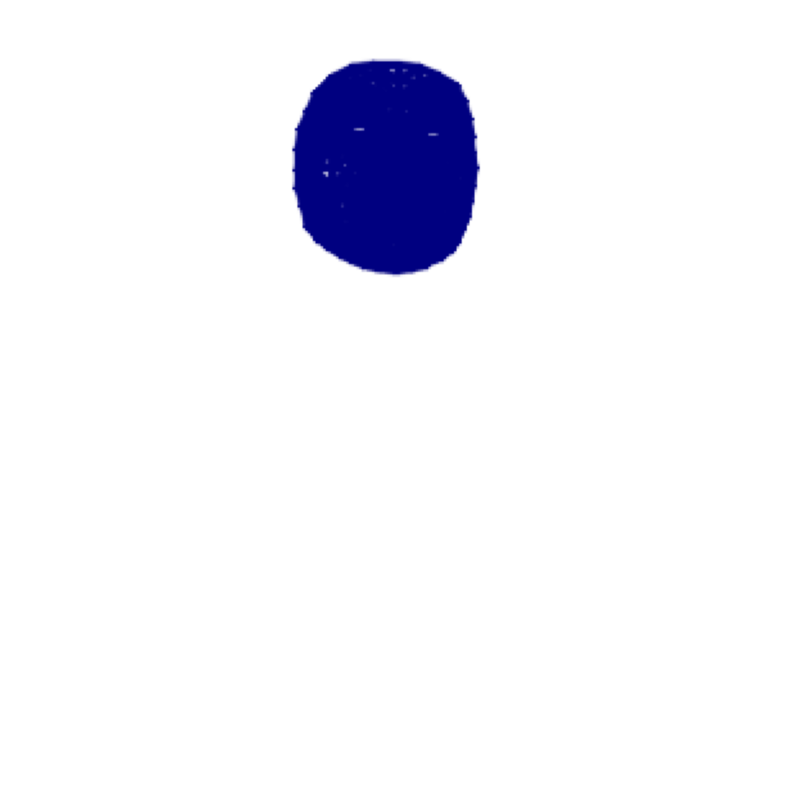

In [30]:
POSE_DIR_ISIGN = "/DATA7/vaibhav/isign/Data/iSign-poses_v1.1/"
video_path = POSE_DIR_ISIGN + 'MluonE1OqLY--18.pose'
data_buffer = open(video_path, "rb").read()
pose = Pose.read(data_buffer)
pose = pose.get_components(['FACE_LANDMARKS'])

# print(pose.body.data.shape)
# pose.body.data = pose.body.data[:,:,body_sample_indices,:]
# print(pose.body.data.shape)
pose_visualizer = PoseVisualizer(pose)

import matplotlib.pyplot as plt

# ...existing code...
for image in pose_visualizer.draw(max_frames = 1):
    # Plot the image using matplotlib
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    plt.axis('off')  # Hide axes
    plt.show()
#print(pose.body.data.shape)

# components = ['LEFT_HAND_LANDMARKS', 'RIGHT_HAND_LANDMARKS', 'POSE_LANDMARKS', 'FACE_LANDMARKS']
# for component in components:
#     print(component)
#     print(pose.get_components([component]).body.data.shape)

    

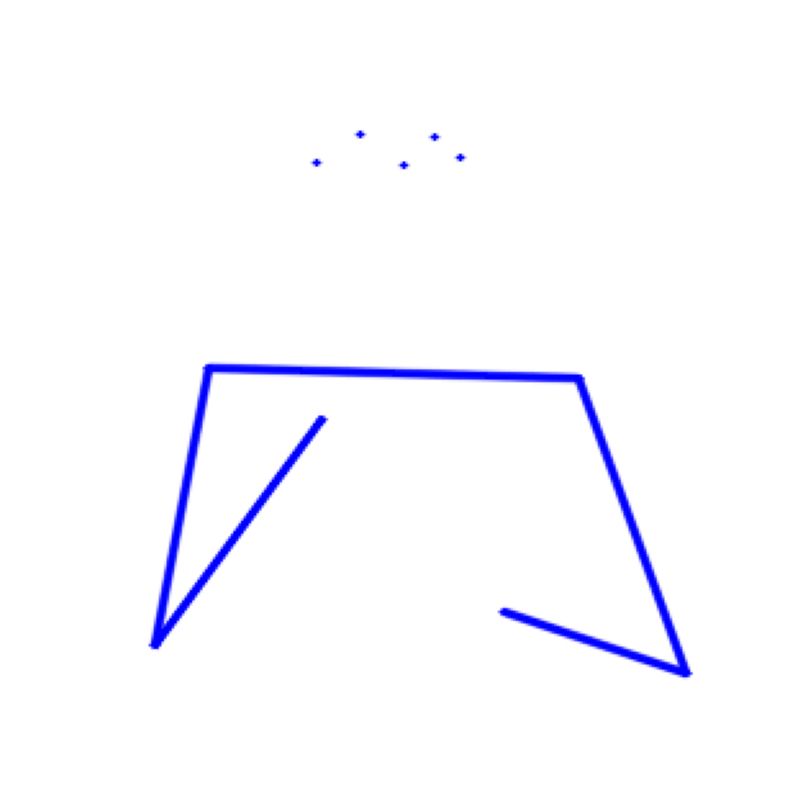

Original data shape: (173, 1, 33, 3)


In [28]:
from pose_format import Pose
from pose_format.pose_visualizer import PoseVisualizer
import numpy as np
import matplotlib.pyplot as plt

def visualize_selected_keypoints(pose_path, selected_indices):
    """
    Visualize only specific keypoints from a pose file
    
    Args:
        pose_path (str): Path to the pose file
        selected_indices (list): List of indices for the keypoints to visualize
    """
    # Read the pose file
    data_buffer = open(pose_path, "rb").read()
    pose = Pose.read(data_buffer)
    pose = pose.get_components(['POSE_LANDMARKS'])
    
    # Create a copy of the pose for modification
    modified_pose = Pose.read(data_buffer)
    modified_pose = modified_pose.get_components(['POSE_LANDMARKS'])
    
    # Create a mask of zeros for all points
    confidence_mask = np.zeros_like(modified_pose.body.confidence)
    
    # Set confidence to 1 only for selected keypoints
    for idx in selected_indices:
        confidence_mask[..., idx] = 1
        
    # Apply the mask to confidence
    modified_pose.body.confidence = modified_pose.body.confidence * confidence_mask
    
    # Create visualizer with modified pose
    pose_visualizer = PoseVisualizer(modified_pose)
    
    # Visualize the pose
    for image in pose_visualizer.draw(max_frames=1):
        plt.figure(figsize=(10, 10))
        plt.imshow(image)
        plt.axis('off')
        plt.show()
        
    return modified_pose


# Call the function
video_path = POSE_DIR_ISIGN + 'MluonE1OqLY--18.pose'
modified_pose = visualize_selected_keypoints(video_path, body_sample_indices)

# If you want to verify the data shape
print("Original data shape:", modified_pose.body.data.shape)

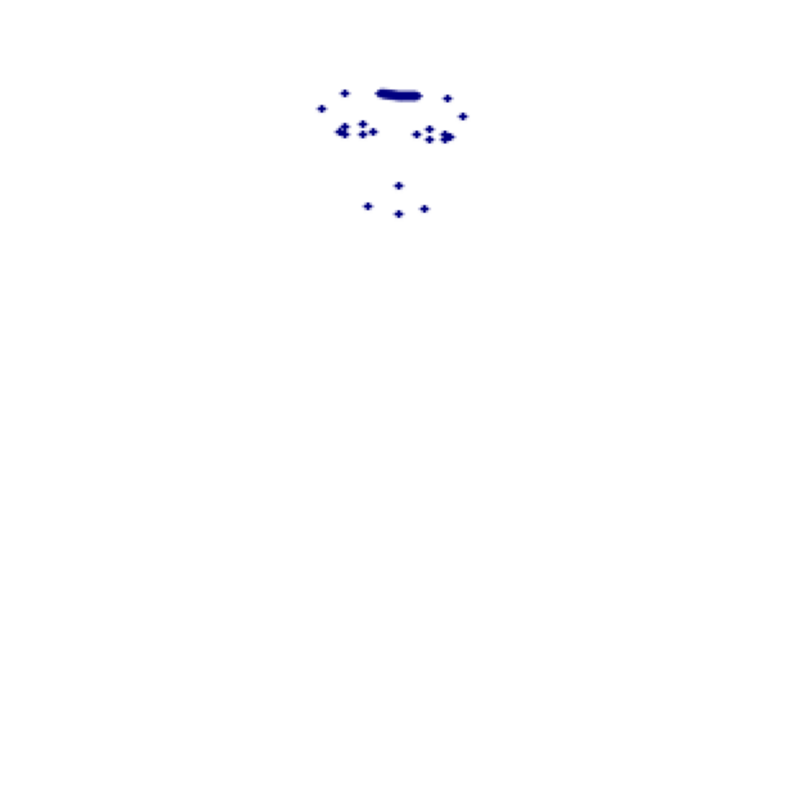

Original data shape: (173, 1, 468, 3)


In [31]:
from pose_format import Pose
from pose_format.pose_visualizer import PoseVisualizer
import numpy as np
import matplotlib.pyplot as plt

def visualize_selected_keypoints(pose_path, selected_indices):
    """
    Visualize only specific keypoints from a pose file
    
    Args:
        pose_path (str): Path to the pose file
        selected_indices (list): List of indices for the keypoints to visualize
    """
    # Read the pose file
    data_buffer = open(pose_path, "rb").read()
    pose = Pose.read(data_buffer)
    pose = pose.get_components(['FACE_LANDMARKS'])
    
    # Create a copy of the pose for modification
    modified_pose = Pose.read(data_buffer)
    modified_pose = modified_pose.get_components(['FACE_LANDMARKS'])
    
    # Create a mask of zeros for all points
    confidence_mask = np.zeros_like(modified_pose.body.confidence)
    
    # Set confidence to 1 only for selected keypoints
    for idx in selected_indices:
        confidence_mask[..., idx] = 1
        
    # Apply the mask to confidence
    modified_pose.body.confidence = modified_pose.body.confidence * confidence_mask
    
    # Create visualizer with modified pose
    pose_visualizer = PoseVisualizer(modified_pose)
    
    # Visualize the pose
    for image in pose_visualizer.draw(max_frames=1):
        plt.figure(figsize=(10, 10))
        plt.imshow(image)
        plt.axis('off')
        plt.show()
        
    return modified_pose


# Call the function
video_path = POSE_DIR_ISIGN + 'MluonE1OqLY--18.pose'
modified_pose = visualize_selected_keypoints(video_path, face_sample_indices)

# If you want to verify the data shape
print("Original data shape:", modified_pose.body.data.shape)